In [3]:
# LOADING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


# STEP 1 : UNDERSTANDING DATA


In [5]:
df=pd.read_csv('/Users/preetish/Downloads/UTM shared document/weather.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [6]:
# getting number of rows and columns in our dataset
df.shape

(8784, 8)

In [7]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [9]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [10]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# STEP 2 : DATA PREPARATION

In [12]:
# changing the datatype of date/time column 
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [13]:
# checking for any dupliated values in our dataset
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [14]:
df.loc[df.duplicated()]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


In [15]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [16]:
# let us sort our data on decreasing  order of the temperature
df.sort_values(by='Temp_C',ascending=False,inplace=True)
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
4695,2012-07-14 15:00:00,33.0,16.8,38,22,48.3,101.31,Mainly Clear
4143,2012-06-21 15:00:00,33.0,19.0,44,24,24.1,100.20,Mainly Clear
4696,2012-07-14 16:00:00,32.9,15.3,35,24,48.3,101.26,Mainly Clear
5199,2012-08-04 15:00:00,32.8,18.8,44,17,24.1,101.39,Clear
4694,2012-07-14 14:00:00,32.7,15.3,35,28,48.3,101.35,Mainly Clear
...,...,...,...,...,...,...,...,...
338,2012-01-15 02:00:00,-21.4,-26.6,63,9,25.0,101.99,Cloudy
345,2012-01-15 09:00:00,-22.2,-27.8,60,9,48.3,102.57,Mainly Clear
343,2012-01-15 07:00:00,-22.8,-28.0,62,9,25.0,102.37,Mainly Clear
342,2012-01-15 06:00:00,-23.2,-28.5,62,7,25.0,102.28,Mostly Cloudy


In [17]:
# calculating the mean for different types of waethers 
df.groupby('Weather')['Temp_C'].mean()

Weather
Clear                                       6.825716
Cloudy                                      7.970544
Drizzle                                     7.353659
Drizzle,Fog                                 8.067500
Drizzle,Ice Pellets,Fog                     0.400000
Drizzle,Snow                                1.050000
Drizzle,Snow,Fog                            0.693333
Fog                                         4.303333
Freezing Drizzle                           -5.657143
Freezing Drizzle,Fog                       -2.533333
Freezing Drizzle,Haze                      -5.433333
Freezing Drizzle,Snow                      -5.109091
Freezing Fog                               -7.575000
Freezing Rain                              -3.885714
Freezing Rain,Fog                          -2.225000
Freezing Rain,Haze                         -4.900000
Freezing Rain,Ice Pellets,Fog              -2.600000
Freezing Rain,Snow Grains                  -5.000000
Haze                                  

In [21]:
# let us split the date time into 2 separate columns for better understanding of data

# Split 'Date/Time' column into separate columns for date and time
df['Date'] = pd.to_datetime(df['Date/Time']).dt.date
df['Time'] = pd.to_datetime(df['Date/Time']).dt.time

# Drop the original 'Date/Time' column
df = df.drop(columns=['Date/Time'])

# Assign modified data to df
df1 = df.copy()

# Display the first few rows of the modified DataFrame
print(df1.head())

      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
4695    33.0              16.8         38               22           48.3   
4143    33.0              19.0         44               24           24.1   
4696    32.9              15.3         35               24           48.3   
5199    32.8              18.8         44               17           24.1   
4694    32.7              15.3         35               28           48.3   

      Press_kPa       Weather        Date      Time  
4695     101.31  Mainly Clear  2012-07-14  15:00:00  
4143     100.20  Mainly Clear  2012-06-21  15:00:00  
4696     101.26  Mainly Clear  2012-07-14  16:00:00  
5199     101.39         Clear  2012-08-04  15:00:00  
4694     101.35  Mainly Clear  2012-07-14  14:00:00  


# CO-RELATION AND REGRESSION ANALYSIS

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Perform correlation analysis
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000  


In [29]:

# Define the features (independent variables) and the target variable
X = df[['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]
y = df['Temp_C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the temperature
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6331758450271051


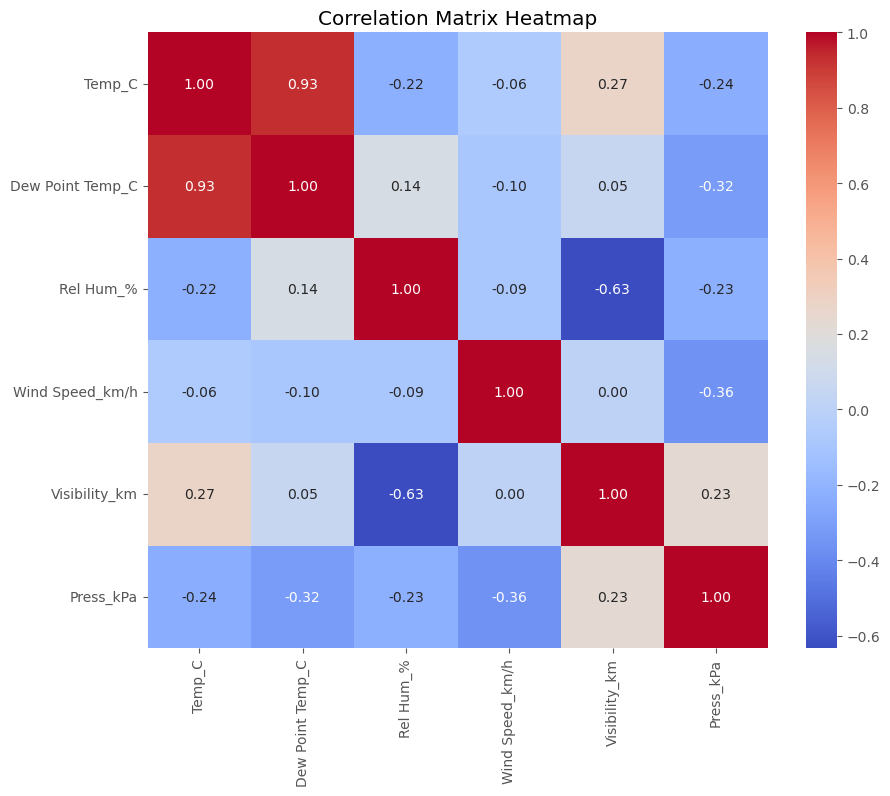

In [31]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
     

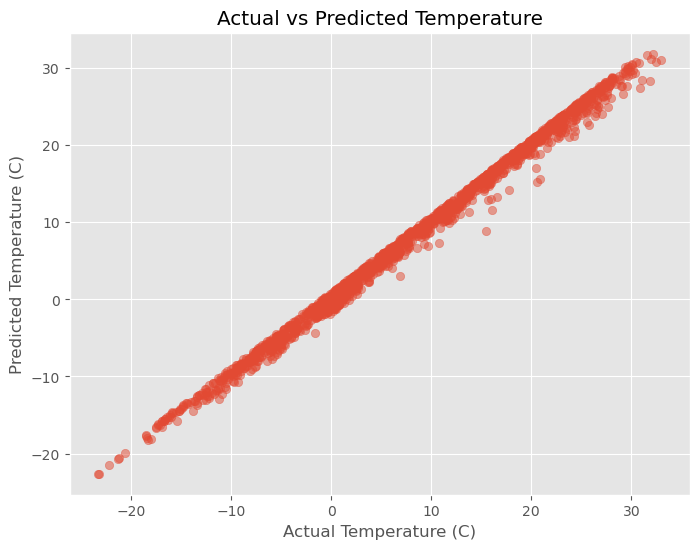

In [33]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperature')
plt.show()